## **PREDICTIVE MODEL FOR BUYING BEHAVOUR**

In [144]:
#import necessaries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder

In [145]:
# get current working directory
cwd = os.getcwd()

df = pd.read_csv(cwd + "/filt_customer_booking.csv", index_col=0)

In [146]:
df = df.reset_index(drop=True)

In [147]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


### **ONE HOT ENCODING FOR CATEGORICAL VARIABLES & SPLITTING TRAIN AND TESTING DATA**

In [148]:
df_final = df

In [149]:
#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [150]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [151]:
#store the label for supervised learning
label = df['booking_complete']

In [152]:
df_final = df_final.drop('booking_complete', axis=1)

In [153]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


### **Normalizaing the values**

In [154]:
from sklearn.preprocessing import StandardScaler
#create a standard scaler object
scaler = StandardScaler()
#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [155]:
#create a dataframe of scaled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [156]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [157]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


### **Correlation matrix**

<Axes: >

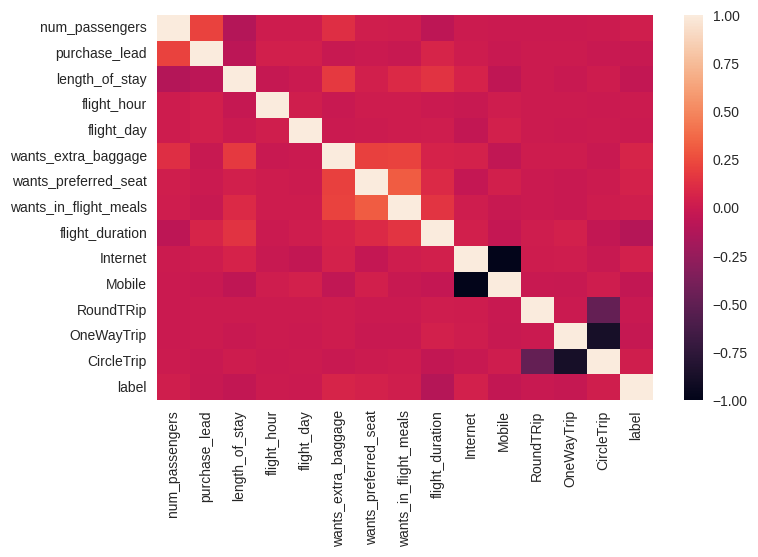

In [158]:
corr = scaled_df.corr()
plt.figure(figsize=(8,5))
#plot the heatmap
sns.heatmap(corr)

Now let's split the dataset into training and test sets.

In [159]:
from sklearn.model_selection import train_test_split
X = scaled_df.iloc[:,:-1]
y = scaled_df['label']
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [161]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

'''
Create functions to fit and predict whether a customer will complete a booking.
Also functions with metrics to evaluate model prediction.


'''

'\nCreate functions to fit and predict whether a customer will complete a booking.\nAlso functions with metrics to evaluate model prediction.\n\n\n'

### **RANDOM FOREST CLASSIFIER**

In [162]:
#create an instance of the classifier and fit the training data
cl_ranfor = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [163]:
#Checking the training accuracy
y_pred_train = model_fit_predict(cl_ranfor, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9341002876078529

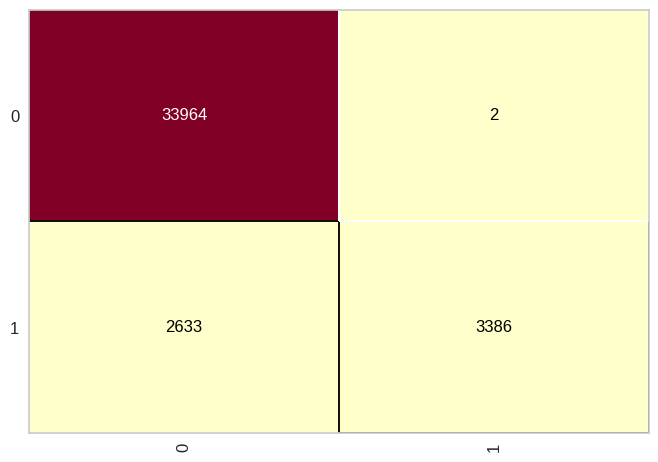

In [164]:
#CONFUSION MATRIX
cm = ConfusionMatrix(cl_ranfor, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_train, y_train)

In [165]:
#checking test accuracy
#create an instance of the classifier and fit the training data
cl_ranfor = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(cl_ranfor, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

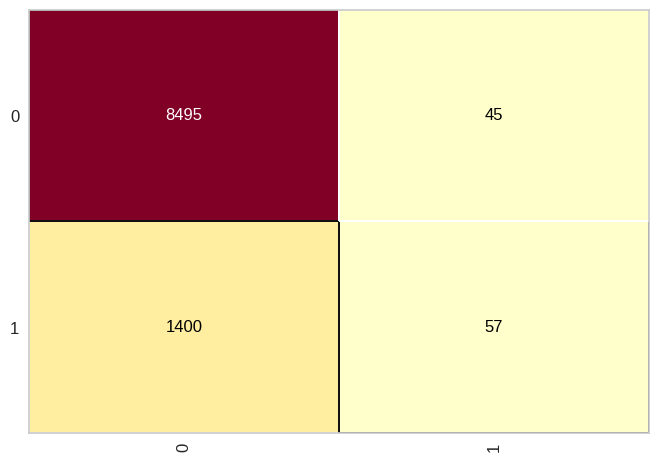

In [166]:
#CONFUSION MATRIX
cm = ConfusionMatrix(cl_ranfor, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

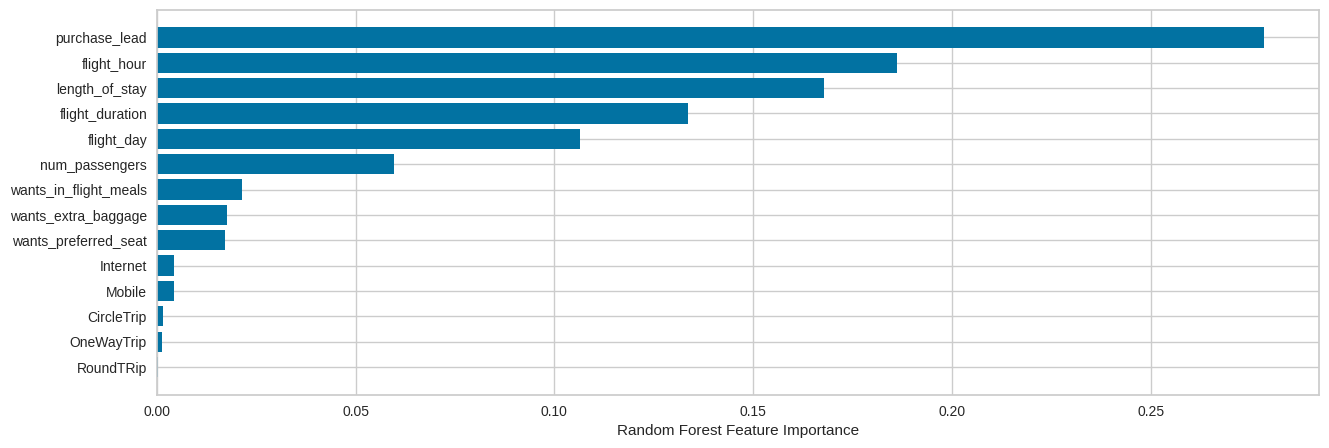

In [167]:
plt.figure(figsize=(15,5))
sorted_idx = cl_ranfor.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], cl_ranfor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One of the main issues with getting a low F1 score is an imbalanced data set. We have higher entries that are classified as 0 than 1. We could reduce the number of entries that are classified as 0 to be equal to the number of entries that are classified as 1.

In [168]:
#Balance the data
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [169]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [170]:
#concatenate the two dataframe
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [171]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [172]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,-0.579424,0.058332,-0.502969,1.281231,-1.412280,0.703587,-0.650054,-0.863557,-1.741921,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
1,-0.579424,-0.531065,1.326356,1.096473,-1.412280,0.703587,-0.650054,-0.863557,-1.300985,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
2,-0.579424,-0.708997,-0.532474,-0.935861,0.093214,0.703587,-0.650054,-0.863557,-0.439155,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
3,-0.579424,-0.820204,-0.591484,-0.566346,1.598707,-1.421288,-0.650054,-0.863557,-0.185282,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,-0.579424,0.803419,-0.089895,-0.751103,1.598707,0.703587,1.538334,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,-0.579424,-0.575548,-0.532474,-0.566346,1.598707,-1.421288,-0.650054,-0.863557,-0.185282,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15472,0.400769,1.081437,-0.502969,0.911715,0.595045,0.703587,1.538334,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15473,-0.579424,0.347470,-0.502969,-0.381588,-1.412280,-1.421288,-0.650054,-0.863557,-1.300985,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15474,-0.579424,-0.875807,-0.089895,2.205019,-0.408618,-1.421288,-0.650054,-0.863557,-0.632900,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1


In [173]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [174]:
#create an instance of the classifier and fit the training data
cl_ranffor = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [175]:
y_pred_test = model_fit_predict(cl_ranfor, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively")

Accuracy, precision, recall and f1-score for training data are 0.62, 0.61, 0.59, 0.64 and 0.6 respectively


0.6198320413436692

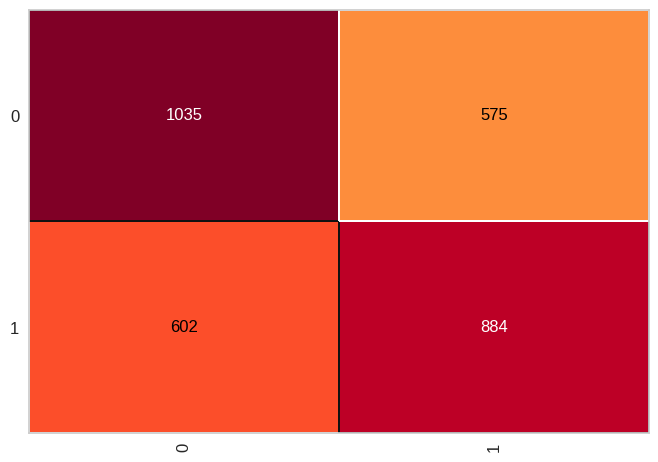

In [176]:
#confusion matrix
cm = ConfusionMatrix(cl_ranfor, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

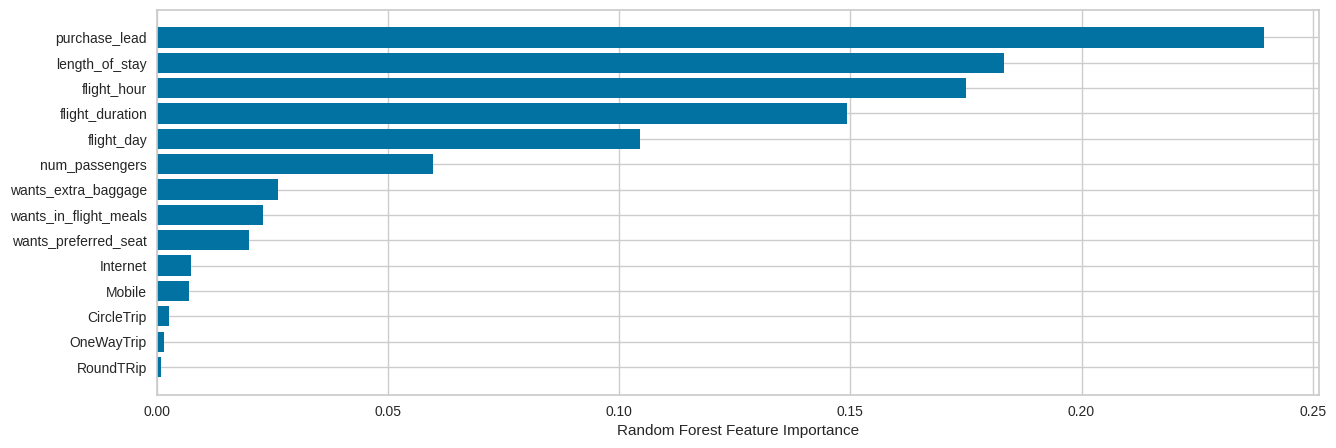

In [179]:
plt.figure(figsize=(15,5))
sorted_idx = cl_ranfor.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], cl_ranfor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")